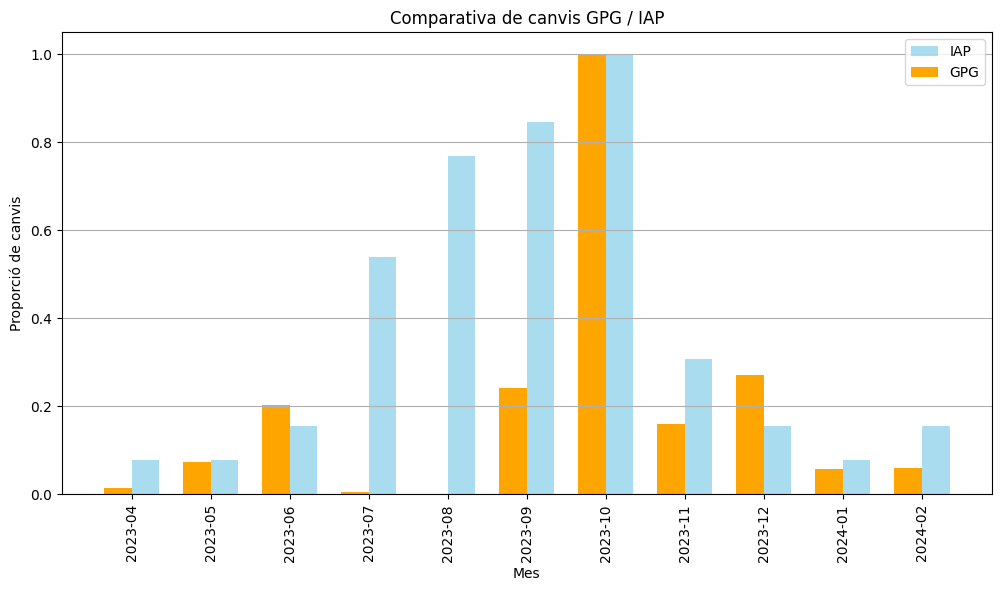

In [2]:
# Font 1: GPG: Informe de canvis en un període eliminant repeticions de titular / data / hora
# Font 2: RSP: Llistat de validacions de SE_Dades_globals (capturat amb app html feta per mi de la pantalla de CatEns)

# Importa les llibreries
import pandas as pd
import matplotlib.pyplot as plt

# Carrega el fitxer Excel a un DataFrame (fitxer 1)
path_fitxer_1 = 'https://github.com/rogroc/rsp/raw/main/modificacions/GPG_modificacions%20(1).xlsx'
df_1 = pd.read_excel(path_fitxer_1)

# Assegura't que hi ha una columna de dates en el DataFrame (fitxer 1)
df_1['Data de modificació'] = pd.to_datetime(df_1['Data de modificació'])

# Crea una nova columna amb el mes i l'any (fitxer 1)
df_1['Mes'] = df_1['Data de modificació'].dt.to_period('M')

# Compta els esdeveniments agrupats per mes (fitxer 1)
comptat_mes_1 = df_1.groupby('Mes').size()

# Carrega el segon fitxer Excel a un DataFrame (fitxer 2)
path_fitxer_2 = 'https://github.com/rogroc/rsp/raw/main/modificacions/Validacions_IAP_SE_Dades_globals_2.xlsx'
df_2 = pd.read_excel(path_fitxer_2)

# Assegura't que hi ha una columna de dates en el DataFrame (fitxer 2)
df_2['Data última modificació'] = pd.to_datetime(df_2['Data última modificació'])

# Crea una nova columna amb el mes i l'any (fitxer 2)
df_2['Mes'] = df_2['Data última modificació'].dt.to_period('M')

# Compta els esdeveniments agrupats per mes (fitxer 2)
comptat_mes_2 = df_2.groupby('Mes').size()

# Combina els comptats dels dos fitxers
comptat_mes_combinat = comptat_mes_1.add(comptat_mes_2, fill_value=0)

# Assegura't que els dos conjunts de dades tinguin els mateixos mesos
comptat_mes_combinat, comptat_mes_2 = comptat_mes_combinat.align(comptat_mes_2, fill_value=0)

# Normalitza les dades pel valor màxim de cada fitxer
max_fitxer_1 = comptat_mes_combinat.max()
max_fitxer_2 = comptat_mes_2.max()

comptat_mes_combinat_norm = comptat_mes_combinat / max_fitxer_1
comptat_mes_2_norm = comptat_mes_2 / max_fitxer_2

# Filtra les dades a partir de setembre de 2022
data_inici = pd.Period('2023-04', freq='M')
comptat_mes_combinat = comptat_mes_combinat[comptat_mes_combinat.index >= data_inici]
comptat_mes_2 = comptat_mes_2[comptat_mes_2.index >= data_inici]

# Normalitza les dades pel valor màxim de cada fitxer
max_fitxer_1 = comptat_mes_combinat.max()
max_fitxer_2 = comptat_mes_2.max()

comptat_mes_combinat_norm = comptat_mes_combinat / max_fitxer_1
comptat_mes_2_norm = comptat_mes_2 / max_fitxer_2

# Crea el gràfic de barres combinat amb amplada ajustada
plt.figure(figsize=(12, 6))
bar_width = 0.35
bar_positions_1 = range(len(comptat_mes_combinat_norm))
bar_positions_2 = [pos + bar_width for pos in bar_positions_1]

plt.bar(bar_positions_2, comptat_mes_2_norm, width=bar_width, color='skyblue', label='IAP', alpha=0.7)
plt.bar(bar_positions_1, comptat_mes_combinat_norm, width=bar_width, color='orange', label='GPG')

# Afegeix etiquetes a l'eix X amb rotació vertical
plt.xticks([pos + bar_width / 2 for pos in bar_positions_1], comptat_mes_combinat_norm.index.astype(str), rotation='vertical')

plt.title('Comparativa de canvis GPG / IAP')
plt.xlabel('Mes')
plt.ylabel('Proporció de canvis')
plt.xticks([pos + bar_width / 2 for pos in bar_positions_1], comptat_mes_combinat.index.astype(str))
plt.grid(axis='y')
plt.legend()
plt.show()

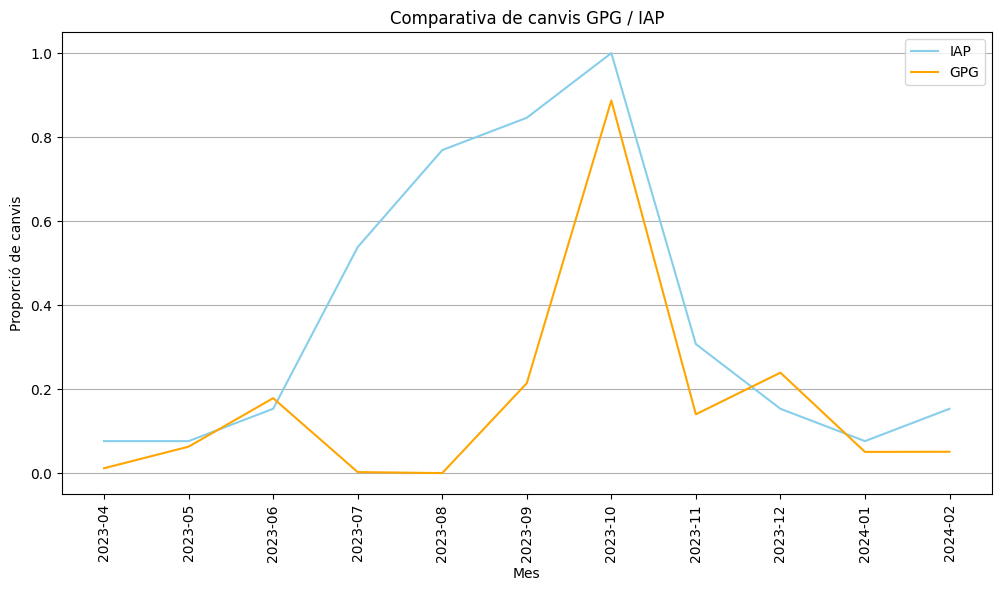

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega el fitxer Excel 1 a un DataFrame
path_fitxer_1 = 'https://github.com/rogroc/rsp/raw/main/modificacions/GPG_modificacions%20(1).xlsx'
df_1 = pd.read_excel(path_fitxer_1)

# Assegura't que hi ha una columna de dates en el DataFrame 1
df_1['Data de modificació'] = pd.to_datetime(df_1['Data de modificació'])

# Crea una nova columna amb el mes i l'any per al DataFrame 1
df_1['Mes'] = df_1['Data de modificació'].dt.to_period('M')

# Compta els esdeveniments agrupats per mes per al DataFrame 1
comptat_mes_1 = df_1.groupby('Mes').size()

# Carrega el fitxer Excel 2 a un DataFrame
path_fitxer_2 = 'https://github.com/rogroc/rsp/raw/main/modificacions/Validacions_IAP_SE_Dades_globals_2.xlsx'
df_2 = pd.read_excel(path_fitxer_2)

# Assegura't que hi ha una columna de dates en el DataFrame 2
df_2['Data última modificació'] = pd.to_datetime(df_2['Data última modificació'])

# Crea una nova columna amb el mes i l'any per al DataFrame 2
df_2['Mes'] = df_2['Data última modificació'].dt.to_period('M')

# Compta els esdeveniments agrupats per mes per al DataFrame 2
comptat_mes_2 = df_2.groupby('Mes').size()

# Combina els comptats dels dos fitxers
comptat_mes_combinat = comptat_mes_1.add(comptat_mes_2, fill_value=0)

# Assegura't que els dos conjunts de dades tinguin els mateixos mesos
comptat_mes_combinat, comptat_mes_2 = comptat_mes_combinat.align(comptat_mes_2, fill_value=0)

# Normalitza les dades pel valor màxim de cada fitxer
max_fitxer_1 = comptat_mes_combinat.max()
max_fitxer_2 = comptat_mes_2.max()

comptat_mes_combinat_norm = comptat_mes_combinat / max_fitxer_1
comptat_mes_2_norm = comptat_mes_2 / max_fitxer_2

# Filtra les dades a partir de setembre de 2022
data_inici = pd.Period('2023-04', freq='M')
comptat_mes_combinat_norm = comptat_mes_combinat_norm[comptat_mes_combinat_norm.index >= data_inici]
comptat_mes_2_norm = comptat_mes_2_norm[comptat_mes_2_norm.index >= data_inici]

# Crea el gràfic de línies
plt.figure(figsize=(12, 6))

# Dibuixa les línies per a les dades
plt.plot(comptat_mes_2_norm.index.astype(str), comptat_mes_2_norm, color='skyblue', label='IAP')
plt.plot(comptat_mes_combinat_norm.index.astype(str), comptat_mes_combinat_norm, color='orange', label='GPG')

plt.title('Comparativa de canvis GPG / IAP')
plt.xlabel('Mes')
plt.ylabel('Proporció de canvis')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.legend()

plt.show()


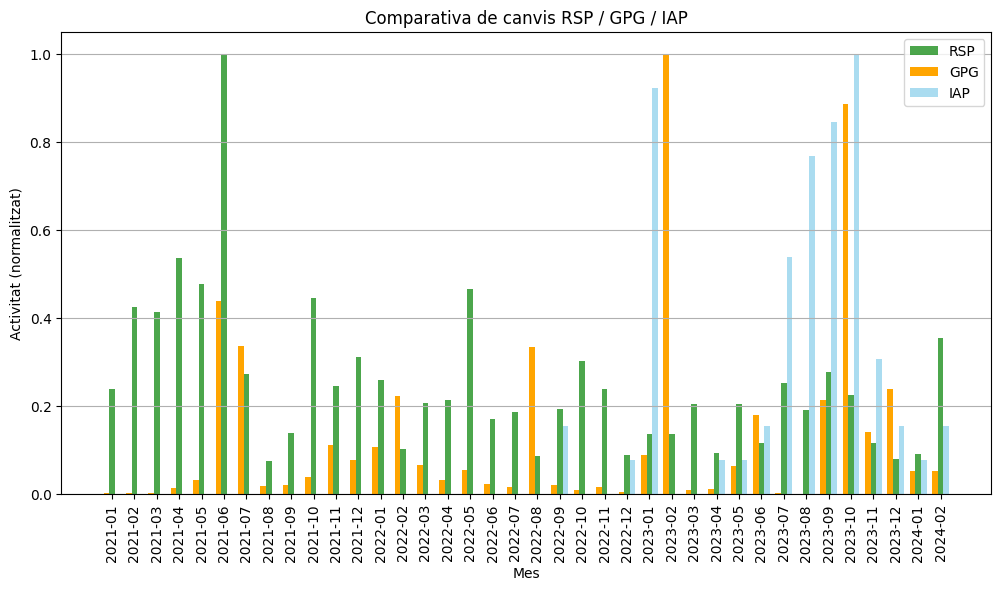

In [4]:
# Importa les llibreries
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

def process_file(file_path, date_column):
    # Carrega el fitxer Excel a un DataFrame
    df = pd.read_excel(file_path)

    # Assegura't que hi ha una columna de dates en el DataFrame
    df['Data'] = pd.to_datetime(df[date_column])

    # Crea una nova columna amb el mes i l'any
    df['Mes'] = df['Data'].dt.to_period('M')

    # Compta els esdeveniments agrupats per mes
    comptat_mes = df.groupby('Mes').size()

    return comptat_mes

# Primer fitxer
path_fitxer_1 = 'https://github.com/rogroc/rsp/raw/main/modificacions/GPG_modificacions%20(1).xlsx'
comptat_mes_1 = process_file(path_fitxer_1, 'Data de modificació')

# Segon fitxer
path_fitxer_2 = 'https://github.com/rogroc/rsp/raw/main/modificacions/Validacions_IAP_SE_Dades_globals_2.xlsx'
comptat_mes_2 = process_file(path_fitxer_2, 'Data última modificació')

# Tercer fitxer
path_fitxer_3 = "https://github.com/rogroc/rsp/raw/main/modificacions/Informe%20de%20Modificacions%20Click&Decide%20des%20de%20l'inici.xlsx"
comptat_mes_3 = process_file(path_fitxer_3, 'Data de modificació')

# Crea una sèrie amb tots els mesos a mostrar
mesos_totals = pd.period_range(start=df_1['Mes'].min(), end=df_1['Mes'].max(), freq='M')

# Utilitza la funció reindex per afegir els mesos amb 0 esdeveniments
comptat_mes_1 = comptat_mes_1.reindex(mesos_totals, fill_value=0)
comptat_mes_2 = comptat_mes_2.reindex(mesos_totals, fill_value=0)
comptat_mes_3 = comptat_mes_3.reindex(mesos_totals, fill_value=0)

# Normalitza les dades pel valor màxim de cada fitxer
max_fitxer_1 = comptat_mes_1.max()
max_fitxer_2 = comptat_mes_2.max()
max_fitxer_3 = comptat_mes_3.max()

comptat_mes_1_norm = comptat_mes_1 / max_fitxer_1
comptat_mes_2_norm = comptat_mes_2 / max_fitxer_2
comptat_mes_3_norm = comptat_mes_3 / max_fitxer_3

# Filtra les dades a partir de setembre de 2022
data_inici = pd.Period('2021-01', freq='M')
comptat_mes_1_norm = comptat_mes_1_norm[comptat_mes_1_norm.index >= data_inici]
comptat_mes_2_norm = comptat_mes_2_norm[comptat_mes_2_norm.index >= data_inici]
comptat_mes_3_norm = comptat_mes_3_norm[comptat_mes_3_norm.index >= data_inici]

# Crea el gràfic de barres combinat amb amplada ajustada
plt.figure(figsize=(12, 6))
bar_width = 0.25
bar_positions_1 = range(len(comptat_mes_1_norm))
bar_positions_2 = [pos + bar_width for pos in bar_positions_1]
bar_positions_3 = [pos + 2 * bar_width for pos in bar_positions_1]

# Afegeix les dades de RSP i GPG al gràfic existent
plt.bar(bar_positions_2, comptat_mes_3_norm, width=bar_width, color='green', label='RSP', alpha=0.7)
plt.bar(bar_positions_1, comptat_mes_1_norm, width=bar_width, color='orange', label='GPG')

# Afegeix les dades d'IAP a la gràfica existent
plt.bar(bar_positions_3, comptat_mes_2_norm, width=bar_width, color='skyblue', label='IAP', alpha=0.7)

# Afegeix les etiquetes de l'eix X amb rotació vertical
plt.xticks([pos + bar_width for pos in bar_positions_1], comptat_mes_1_norm.index.astype(str), rotation='vertical')

# Mostra la gràfica actualitzada
plt.title('Comparativa de canvis RSP / GPG / IAP')
plt.xlabel('Mes')
plt.ylabel('Activitat (normalitzat)')
plt.grid(axis='y')
plt.legend()
plt.show()

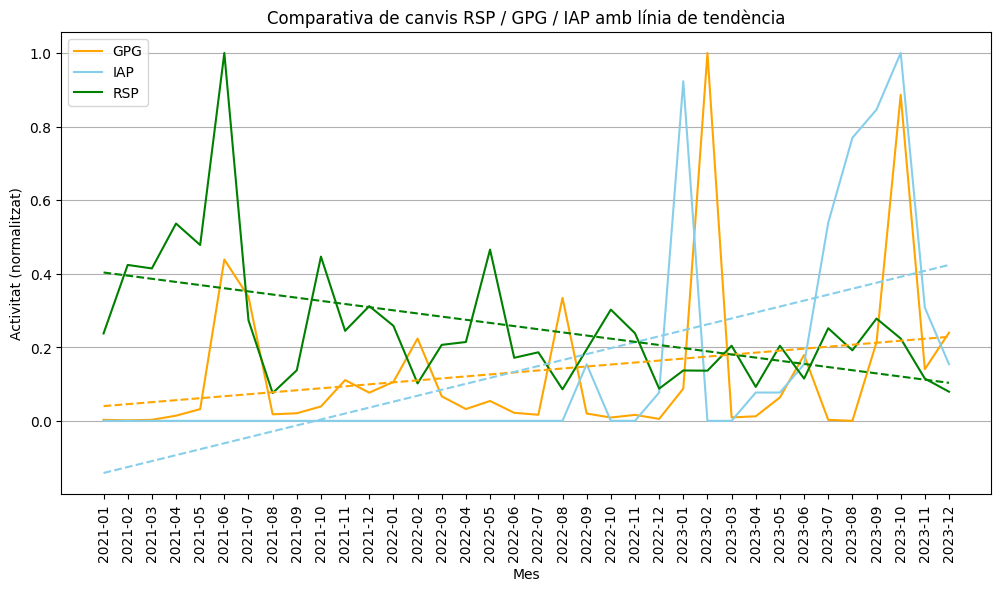

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def process_file(file_path, date_column):
    # Carrega el fitxer Excel a un DataFrame
    df = pd.read_excel(file_path)

    # Assegura't que hi ha una columna de dates en el DataFrame
    df['Data'] = pd.to_datetime(df[date_column])

    # Crea una nova columna amb el mes i l'any
    df['Mes'] = df['Data'].dt.to_period('M')

    # Compta els esdeveniments agrupats per mes
    comptat_mes = df.groupby('Mes').size()

    return comptat_mes

# Fitxer 1
path_fitxer_1 = 'https://github.com/rogroc/rsp/raw/main/modificacions/GPG_modificacions%20(1).xlsx'
comptat_mes_1 = process_file(path_fitxer_1, 'Data de modificació')

# Fitxer 2
path_fitxer_2 = 'https://github.com/rogroc/rsp/raw/main/modificacions/Validacions_IAP_SE_Dades_globals_2.xlsx'
comptat_mes_2 = process_file(path_fitxer_2, 'Data última modificació')

# Fitxer 3
path_fitxer_3 = "https://github.com/rogroc/rsp/raw/main/modificacions/Informe%20de%20Modificacions%20Click&Decide%20des%20de%20l'inici.xlsx"
comptat_mes_3 = process_file(path_fitxer_3, 'Data de modificació')

# Crea una sèrie amb tots els mesos a mostrar
mesos_totals = pd.period_range(start=min(comptat_mes_1.index.min(), comptat_mes_2.index.min(), comptat_mes_3.index.min()),
                               end='12/2023')

# Utilitza la funció reindex per afegir els mesos amb 0 esdeveniments
comptat_mes_1 = comptat_mes_1.reindex(mesos_totals, fill_value=0)
comptat_mes_2 = comptat_mes_2.reindex(mesos_totals, fill_value=0)
comptat_mes_3 = comptat_mes_3.reindex(mesos_totals, fill_value=0)

# Normalitza les dades pel valor màxim de cada fitxer
max_fitxer_1 = comptat_mes_1.max()
max_fitxer_2 = comptat_mes_2.max()
max_fitxer_3 = comptat_mes_3.max()

comptat_mes_1_norm = comptat_mes_1 / max_fitxer_1
comptat_mes_2_norm = comptat_mes_2 / max_fitxer_2
comptat_mes_3_norm = comptat_mes_3 / max_fitxer_3

# Filtra les dades a partir de gener de 2021
data_inici = pd.Period('2021-01', freq='M')
comptat_mes_1_norm = comptat_mes_1_norm[comptat_mes_1_norm.index >= data_inici]
comptat_mes_2_norm = comptat_mes_2_norm[comptat_mes_2_norm.index >= data_inici]
comptat_mes_3_norm = comptat_mes_3_norm[comptat_mes_3_norm.index >= data_inici]

import numpy as np
# Càlcul de la línia de tendència amb regressió lineal
def calculate_trendline(x, y):
    coefficients = np.polyfit(x, y, 1)  # grau 1 per a regressió lineal (recta)
    polynomial = np.poly1d(coefficients)
    trendline = polynomial(x)
    return trendline

# Crea el gràfic de línies
plt.figure(figsize=(12, 6))

# Dibuixa les línies per a cada fitxer sense marcadors
plt.plot(comptat_mes_1_norm.index.astype(str), comptat_mes_1_norm, color='orange', label='GPG')
plt.plot(comptat_mes_2_norm.index.astype(str), comptat_mes_2_norm, color='skyblue', label='IAP')
plt.plot(comptat_mes_3_norm.index.astype(str), comptat_mes_3_norm, color='green', label='RSP')

# Afegeix la línia de tendència per a cada sèrie de dades
plt.plot(comptat_mes_1_norm.index.astype(str), calculate_trendline(np.arange(len(comptat_mes_1_norm)), comptat_mes_1_norm), linestyle='dashed', color='orange')
plt.plot(comptat_mes_2_norm.index.astype(str), calculate_trendline(np.arange(len(comptat_mes_2_norm)), comptat_mes_2_norm), linestyle='dashed', color='skyblue')
plt.plot(comptat_mes_3_norm.index.astype(str), calculate_trendline(np.arange(len(comptat_mes_3_norm)), comptat_mes_3_norm), linestyle='dashed', color='green')

# Configuració de la visualització
plt.title('Comparativa de canvis RSP / GPG / IAP amb línia de tendència')
plt.xlabel('Mes')
plt.ylabel('Activitat (normalitzat)')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.legend()

# Mostra el gràfic
plt.show()
